In [1]:
# 이 코드에서는 네이버 뉴스에서 긁어온 뉴스 기사를 분석하고 불용어를 처리하는 방법에 대해 알아봅니다.

from matplotlib import font_manager, rc

path = "C:/windows/fonts/HMKMRHD.ttf" # matplot의 폰트를 지정하기 위한 경로 설정
font = font_manager.FontProperties(fname=path).get_name() # 폰트매니저 객체 생성
rc("font", family=font) # 폰트 변경

## 간단한 구두점 처리

In [3]:
import re # 정규식 처리를 위한 모듈
from nltk.tokenize import word_tokenize # 문장 토큰화를 위한 모듈
from string import punctuation # 구두점 처리를 위한 모듈

sentence = "I'd like to learn more something."

# 정규식 처리를 위한 패턴 정의
pattern = re.compile(r'[{0}]'.format(re.escape(punctuation)))

tokens = []
for term in word_tokenize(sentence):
    tokens.append(pattern.sub('',term)) # 패턴에 부합되는 문자를 whitespace로 replace
    
print(tokens)
print(word_tokenize(sentence)) 

In [4]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## 한국어 구두점 처리

In [5]:
# 한국어 구두점 처리
sentence = '파이썬, 자연어처리, 그리고'

pattern = re.compile(r'[{0}]'.format(re.escape(punctuation)))

tokens = []
for term in word_tokenize(sentence):
    tokens.append(pattern.sub('',term))
    
print(tokens)
print(word_tokenize(sentence))

['파이썬', '', '자연어처리', '', '그리고']
['파이썬', ',', '자연어처리', ',', '그리고']


 ## nltk.gutenberg 말뭉치의 최빈단어를 그래프로 출력해보기

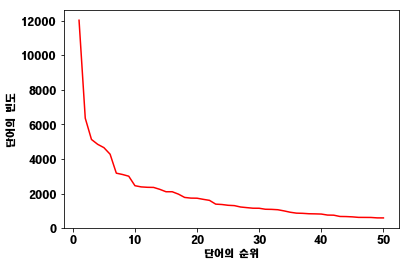

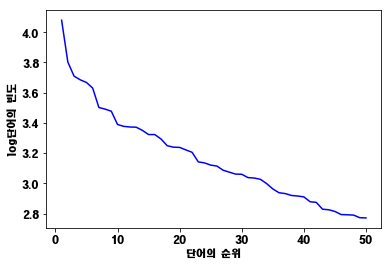

In [7]:
# nltk.gutenberg 말뭉치의 최빈(가장 많이 나온) 단어 그래프로 출력해보기

from nltk.corpus import gutenberg # 구텐베르크 말뭉치 임포트
from konlpy.corpus import kolaw # konlpy의 법전 말뭉치 임포트
from nltk import Text # 문서 하나를 편리하게 탐색할 수 있는 다양한 기능을 제공하는 모듈
import matplotlib.pyplot as plt
import math
import os

kcorpus = kolaw.open(kolaw.fileids()[0]).read() # konlpy -> kolaw를 받는 corpus 객체
corpus = gutenberg.open(gutenberg.fileids()[0]).read() # nltk -> 'Emma' 소설(0번인덱스)을 받는 corpus 객체
tokens = Text(word_tokenize(corpus)) # 토큰화된 말뭉치를 저장

# 가장 출현 횟수가 높은 단어를 찾음. (nltk.text.most_common)
x = range(1, len(tokens.vocab().most_common(50))+1)
y = [token[1] for token in tokens.vocab().most_common(50)]

_x = [math.log10(_) for _ in x]
_y = [math.log10(_) for _ in y]

# 도표 텍스트 수정
plt.plot(x, y, 'r-')
plt.xlabel('단어의 순위')
plt.ylabel('단어의 빈도')
plt.show()

plt.plot(x, _y, 'b-')
plt.xlabel('단어의 순위')
plt.ylabel('log단어의 빈도')
plt.show()

## 직접 크롤링한 네이버 뉴스기사들의 최빈단어를 그래프로 출력해보기

C:\Users\brsta\Documents\.0311_main.py


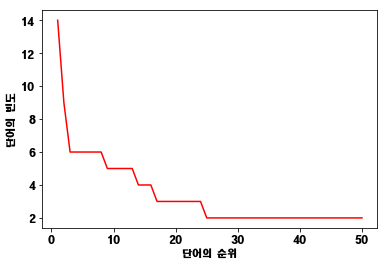

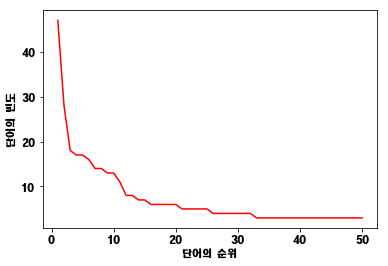

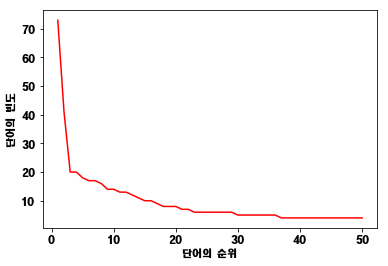

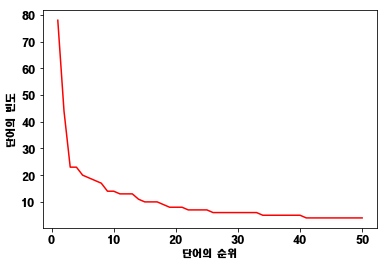

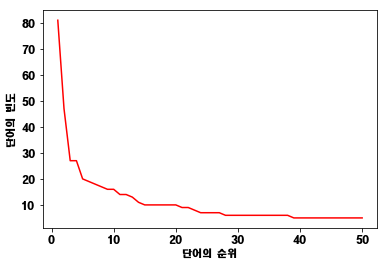

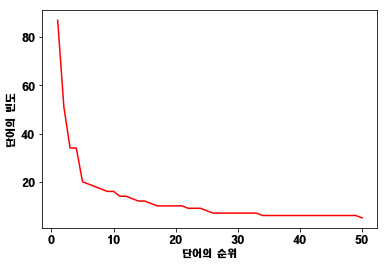

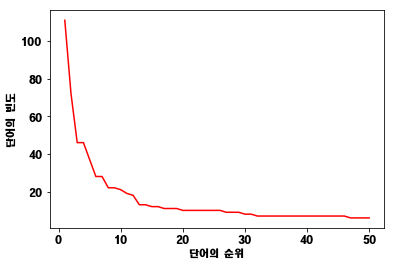

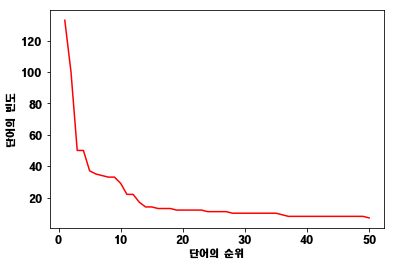

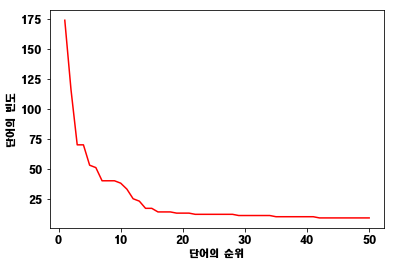

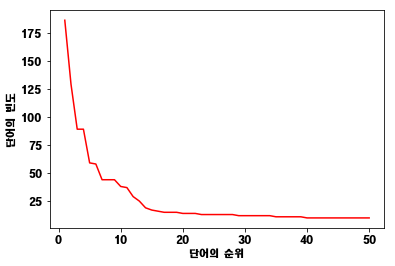

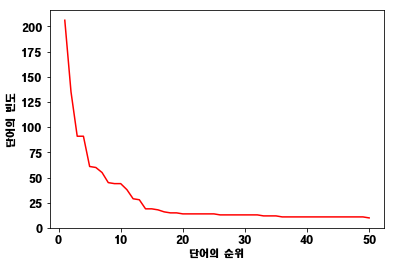

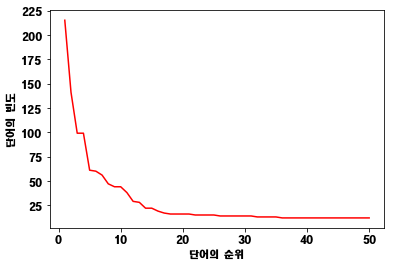

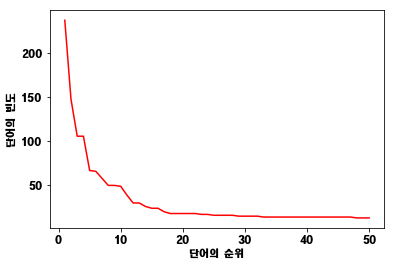

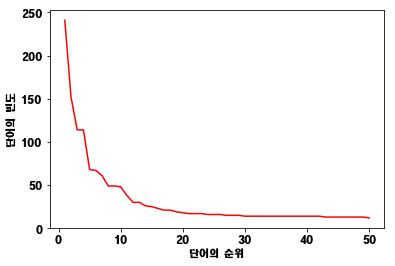

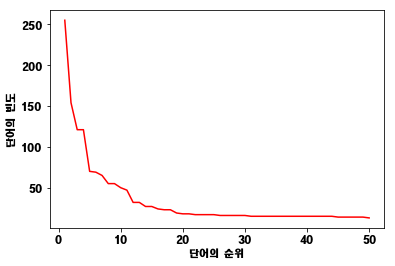

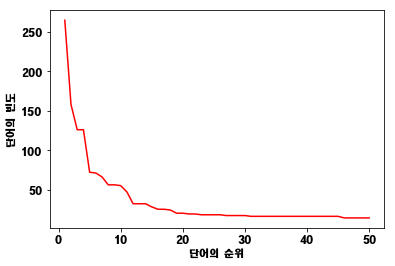

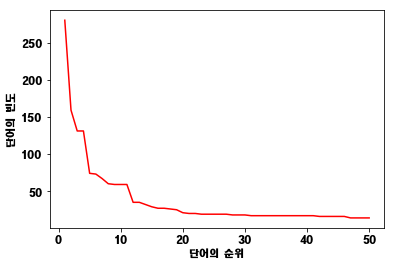

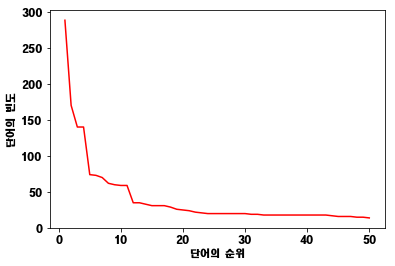

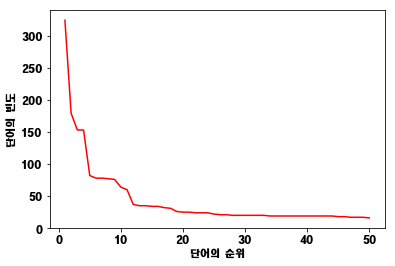

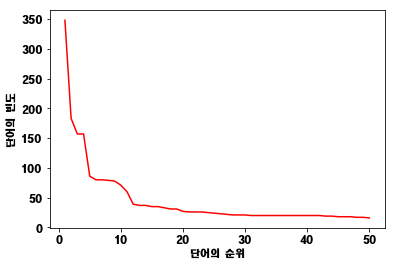

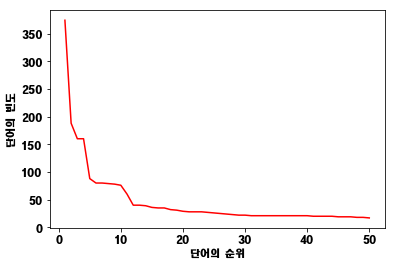

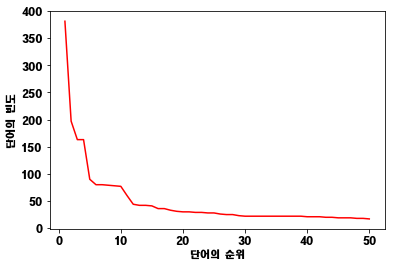

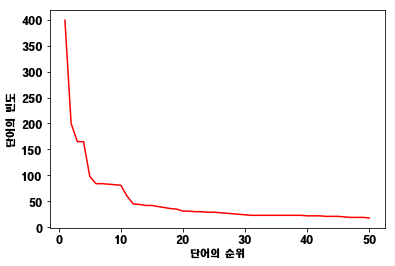

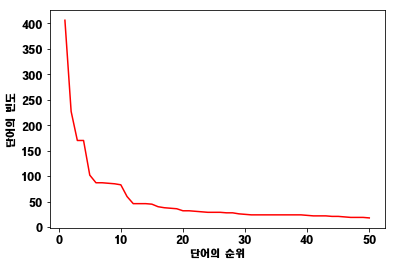

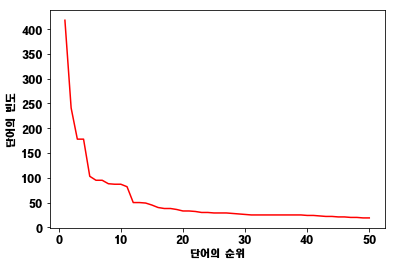

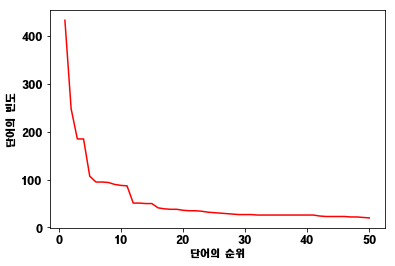

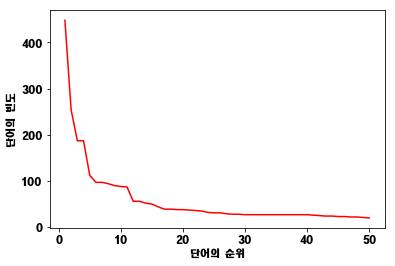

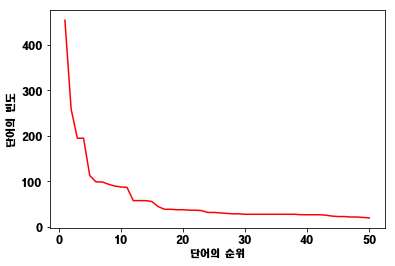

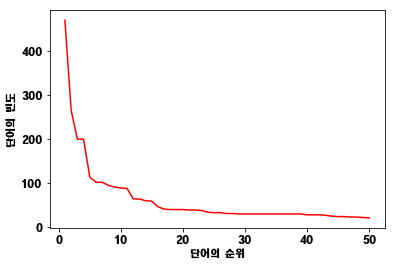

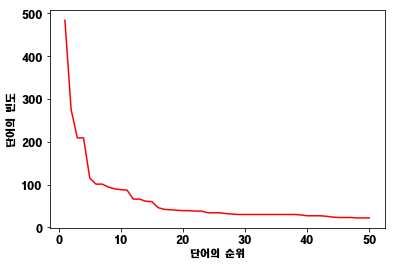

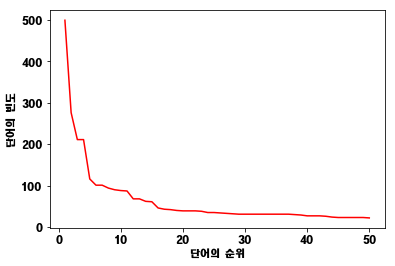

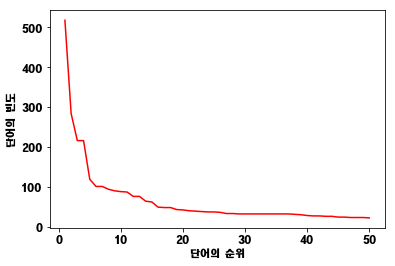

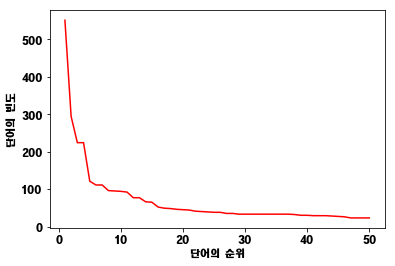

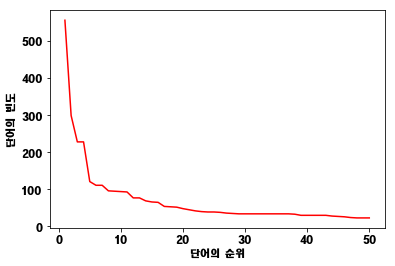

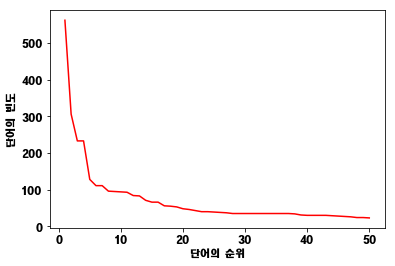

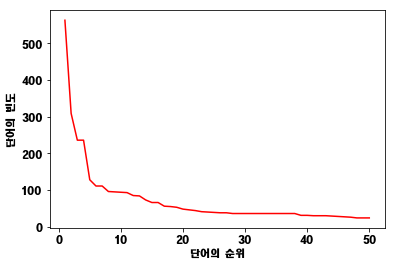

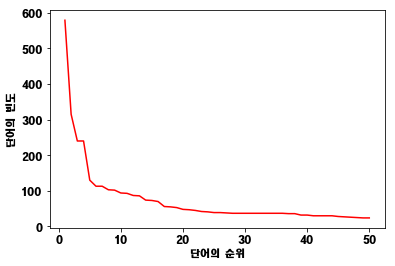

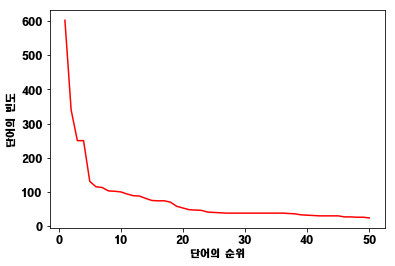

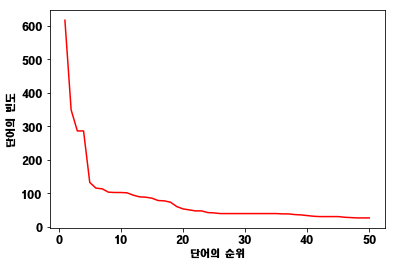

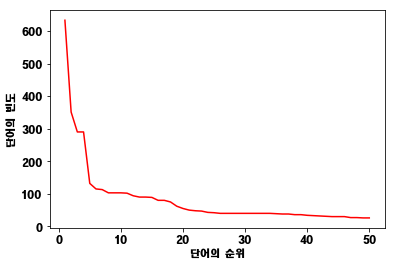

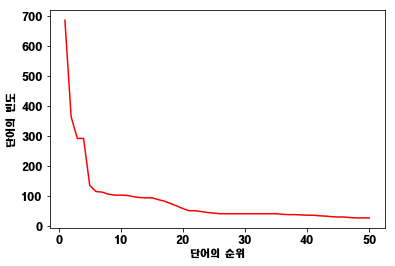

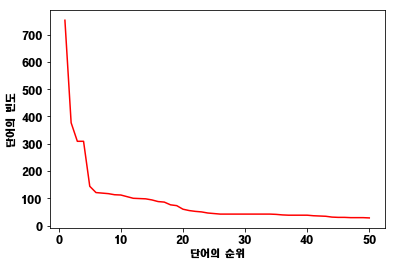

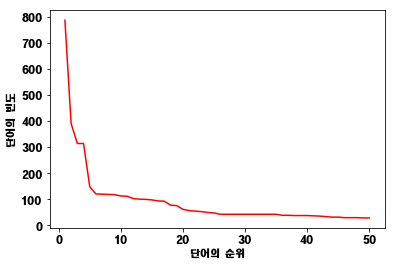

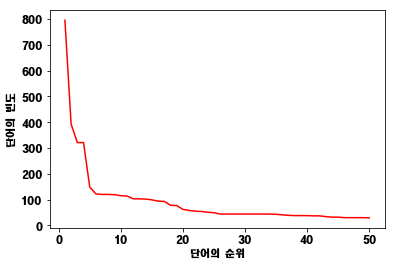

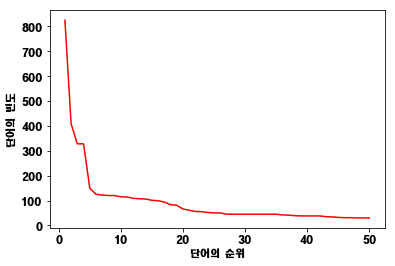

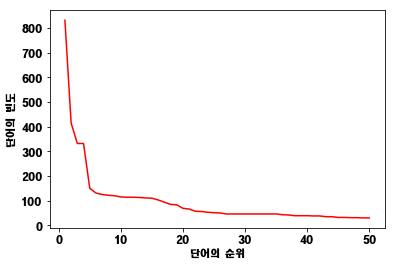

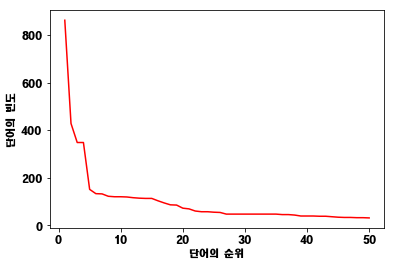

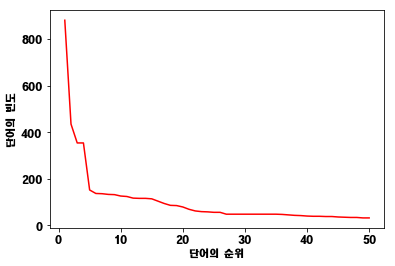

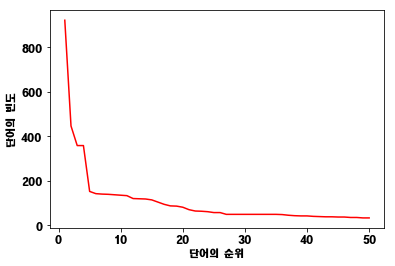

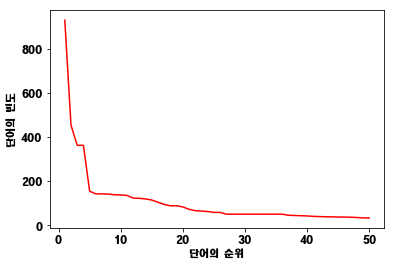

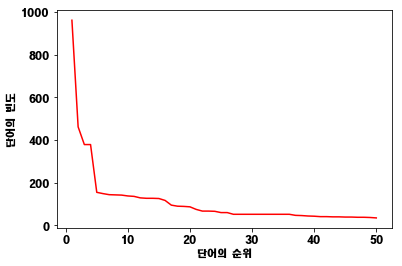

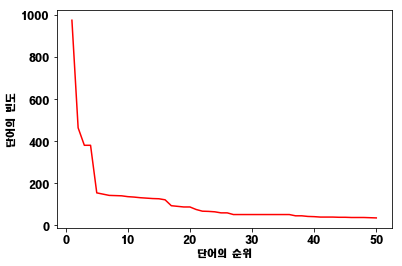

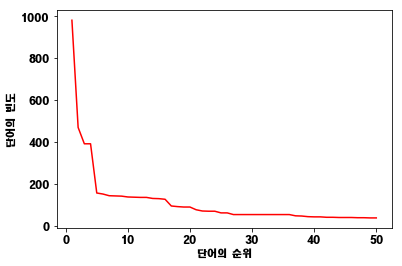

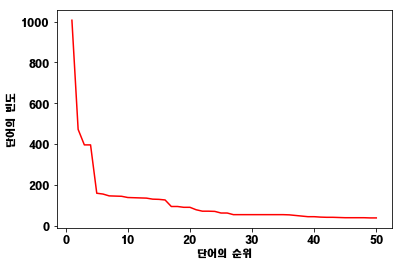

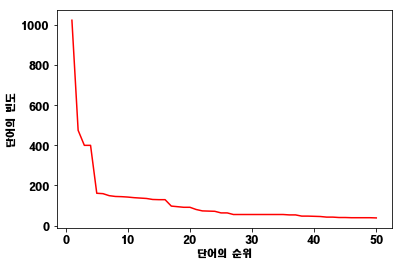

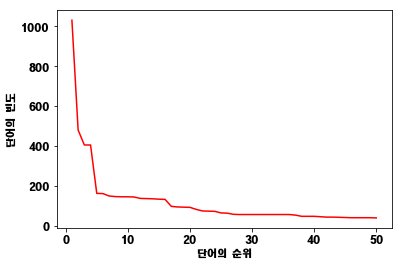

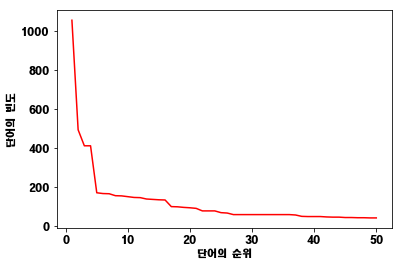

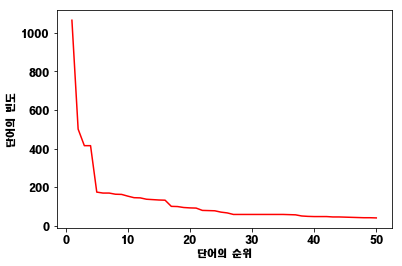

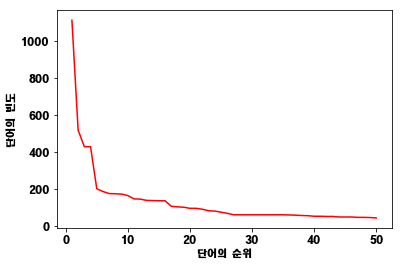

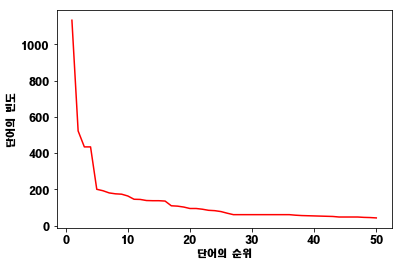

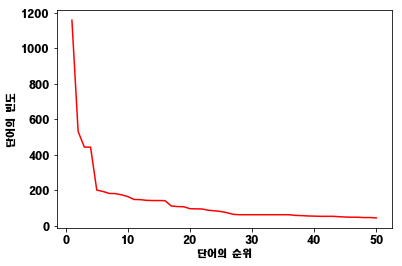

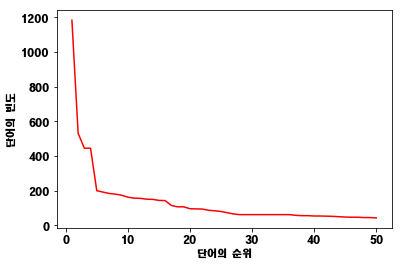

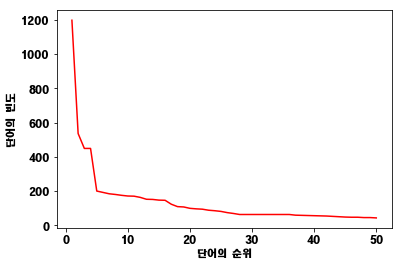

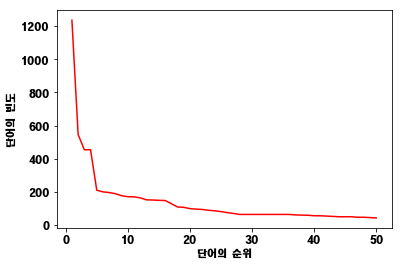

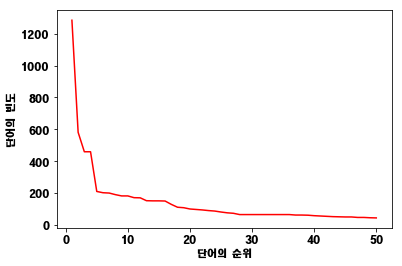

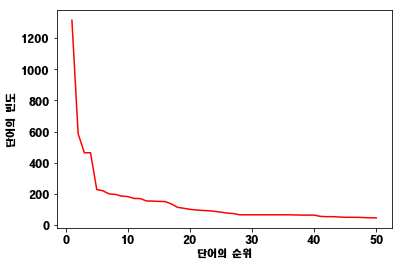

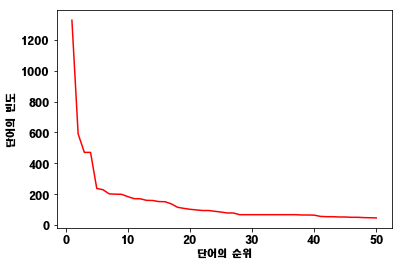

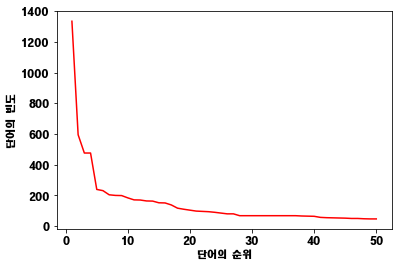

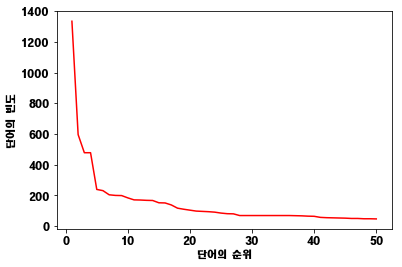

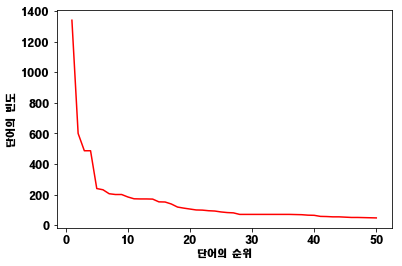

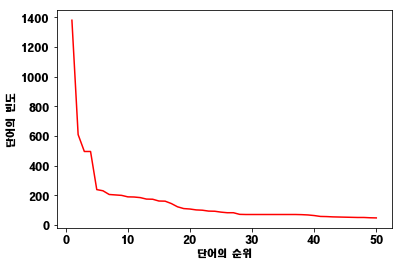

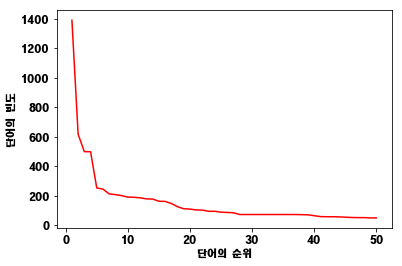

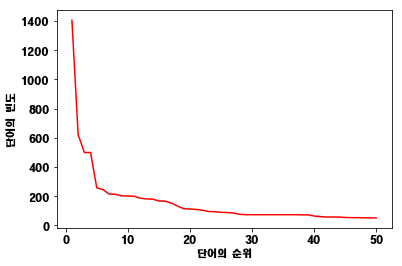

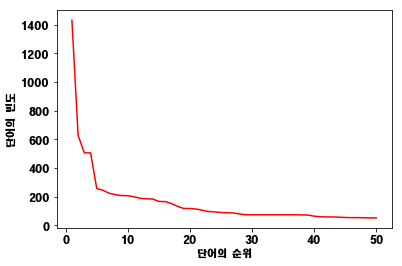

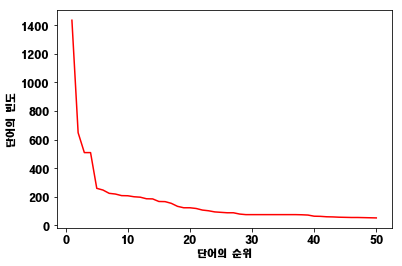

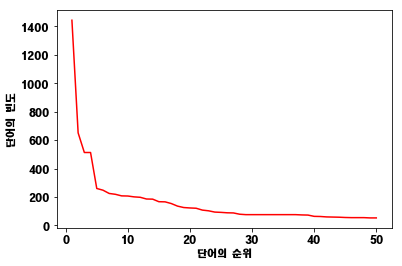

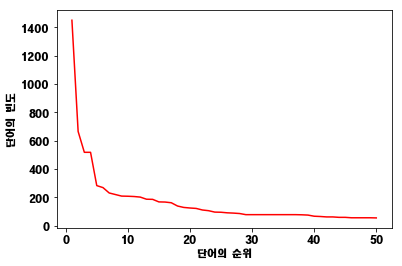

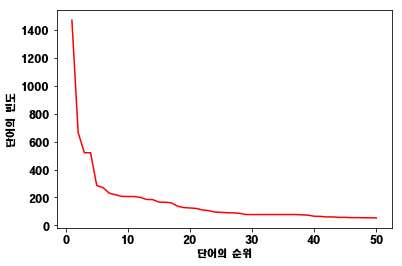

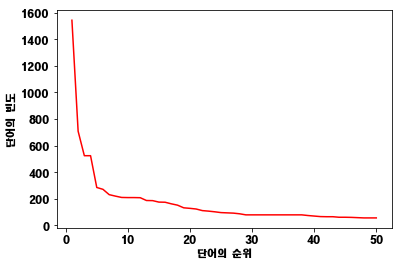

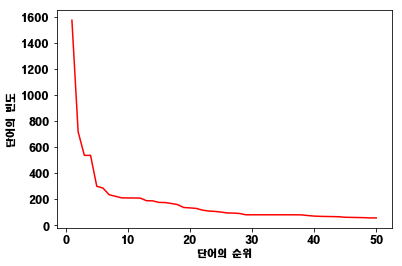

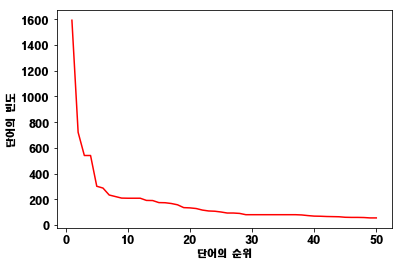

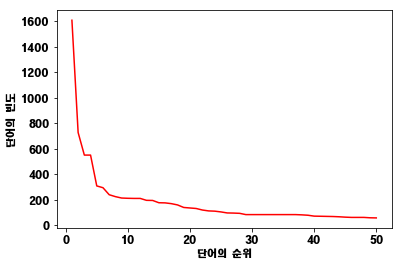

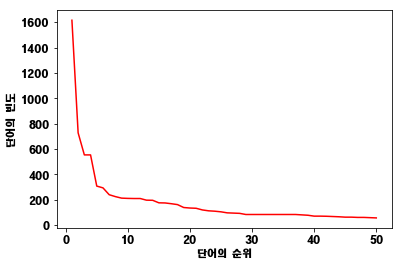

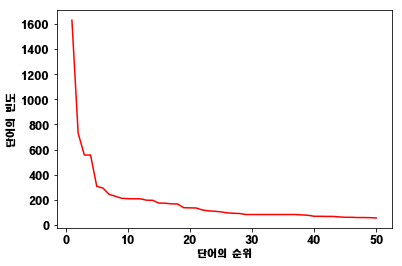

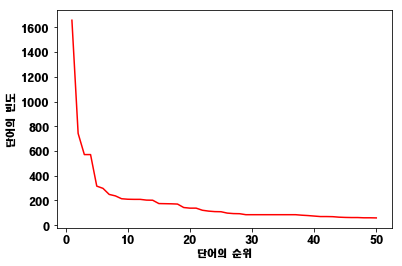

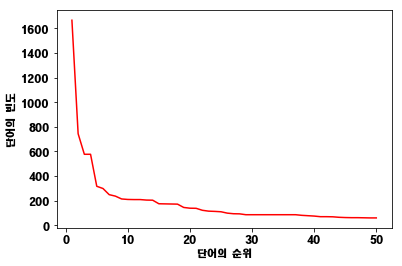

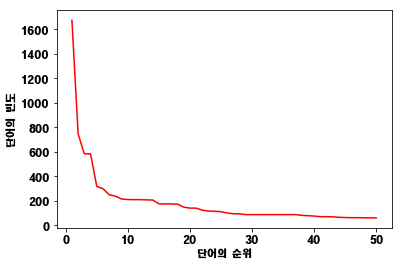

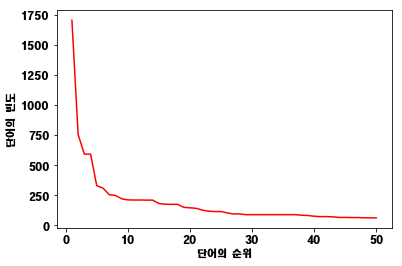

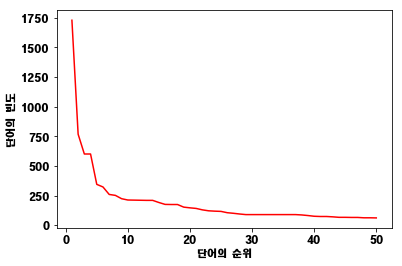

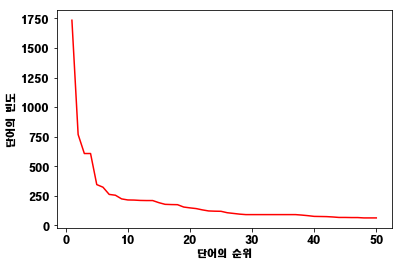

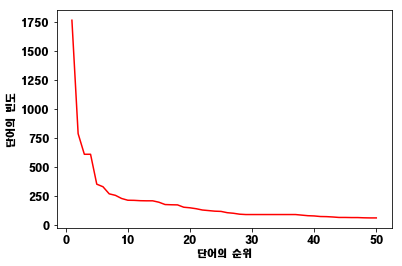

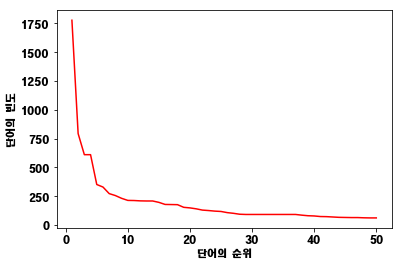

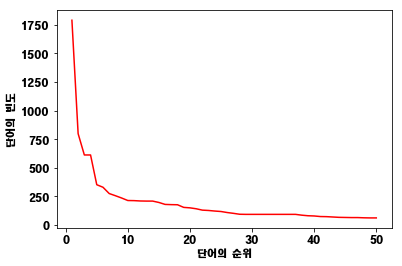

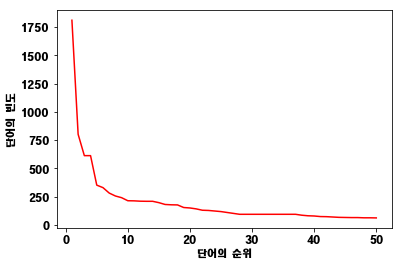

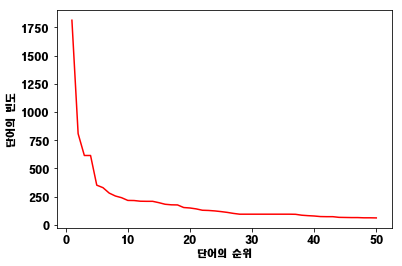

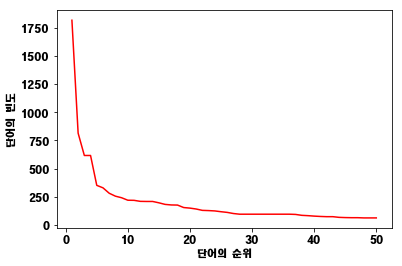

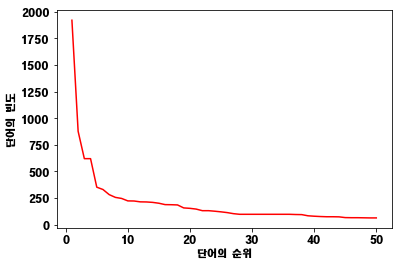

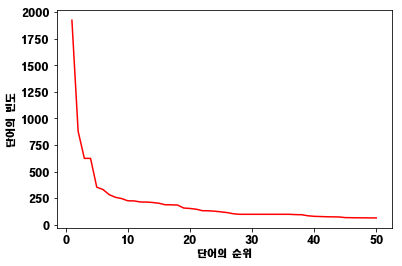

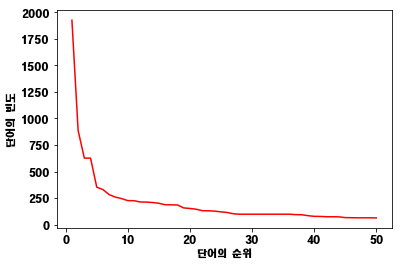

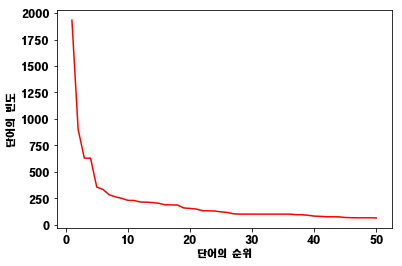

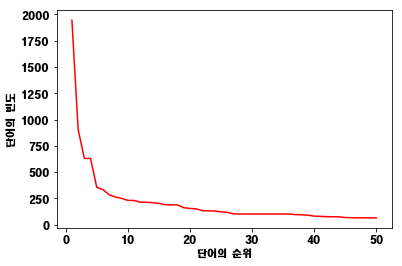

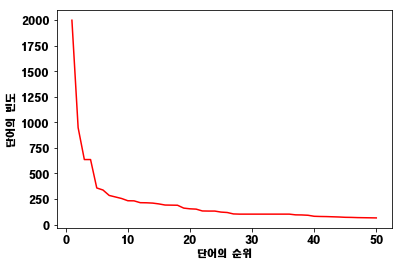

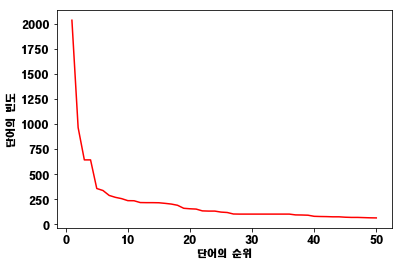

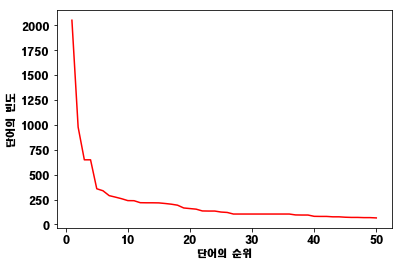

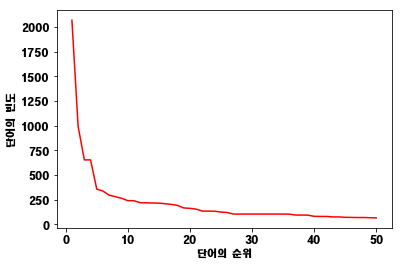

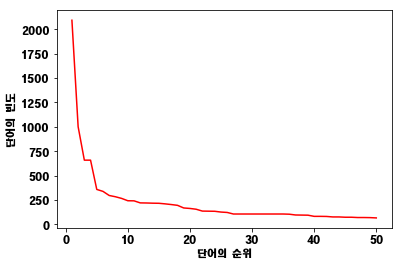

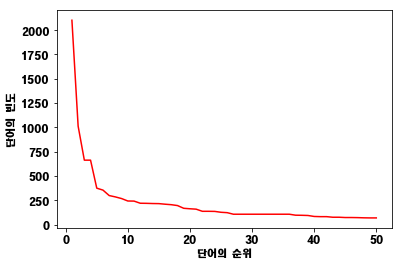

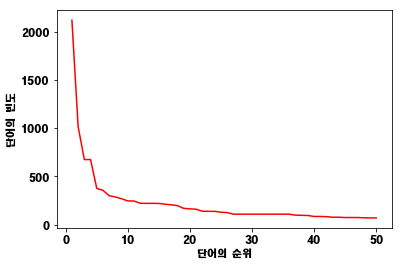

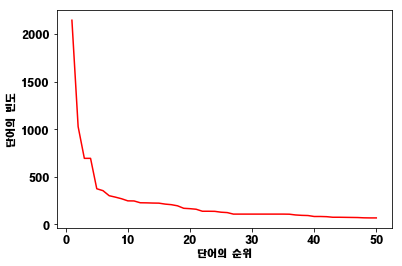

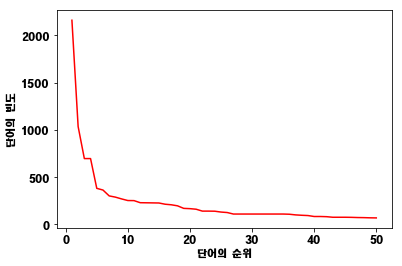

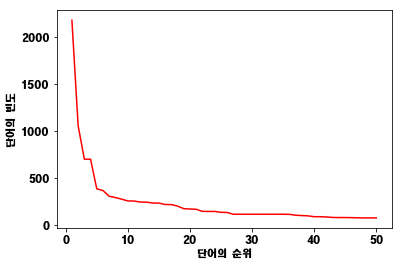

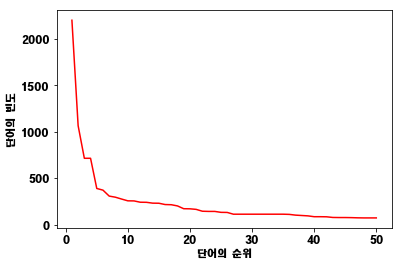

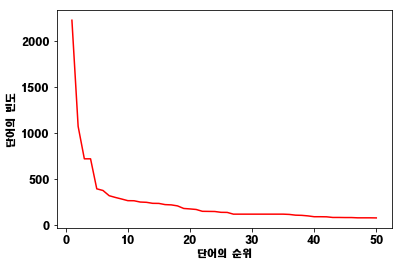

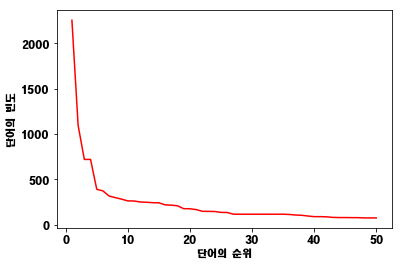

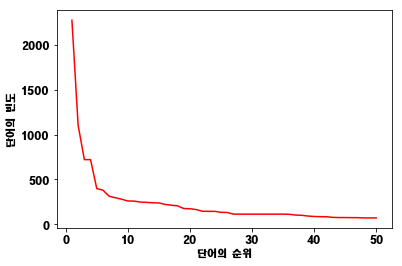

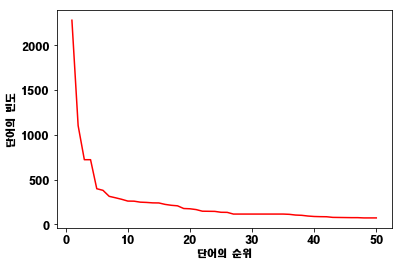

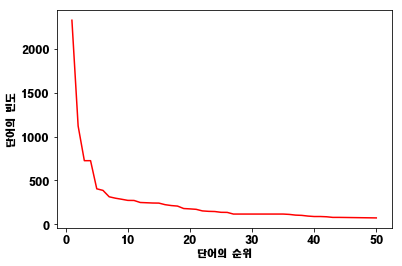

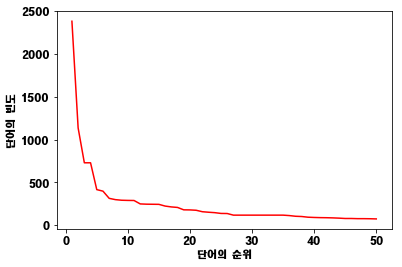

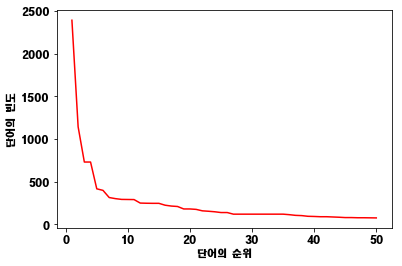

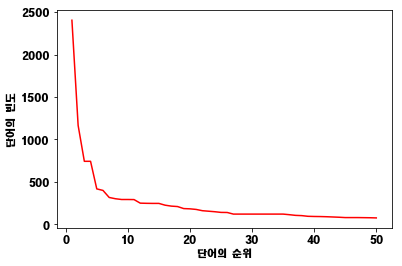

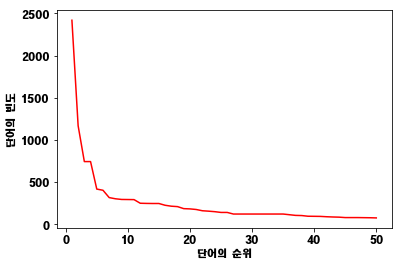

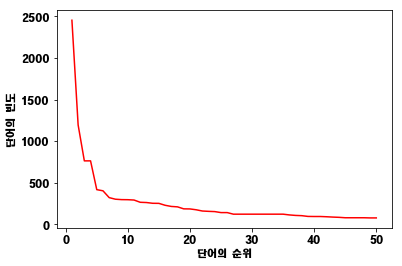

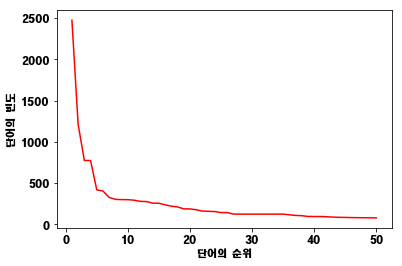

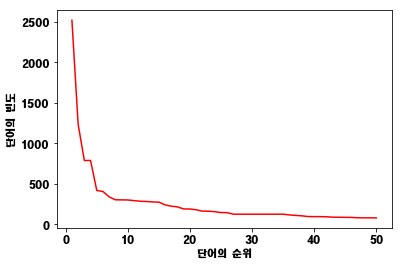

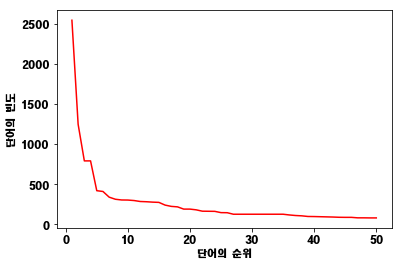

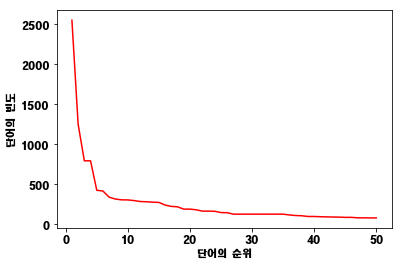

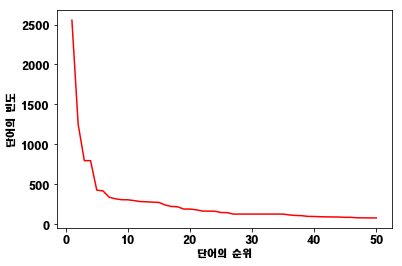

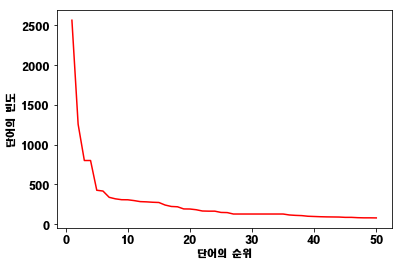

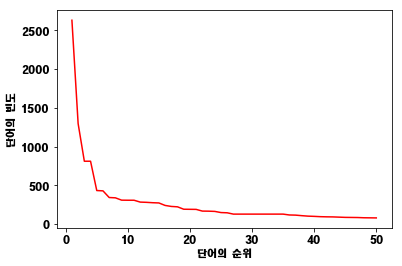

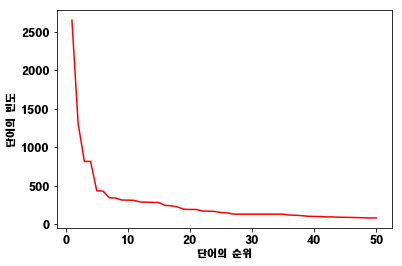

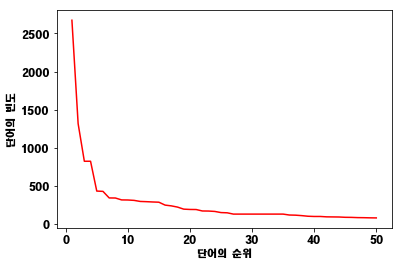

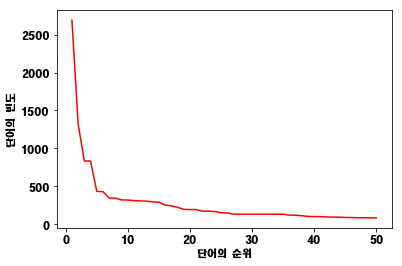

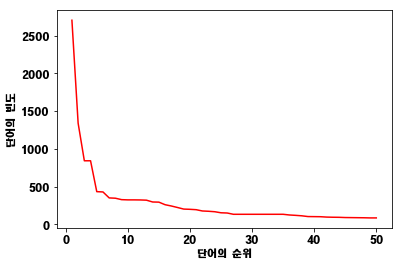

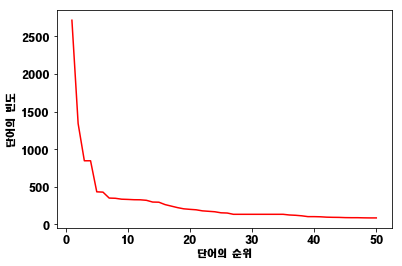

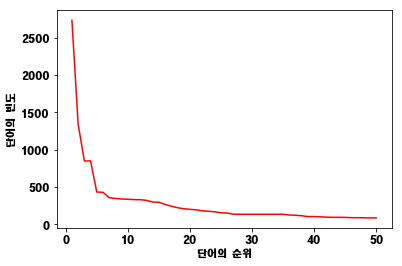

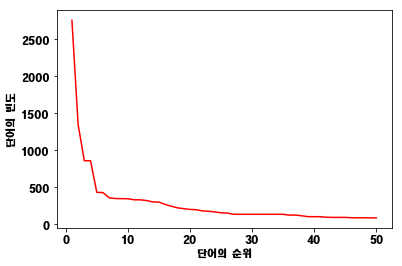

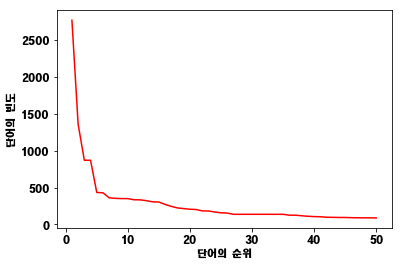

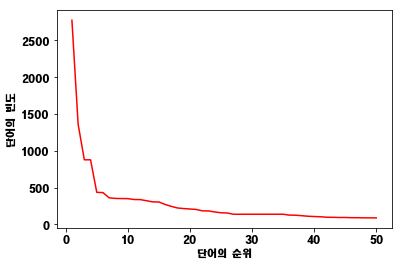

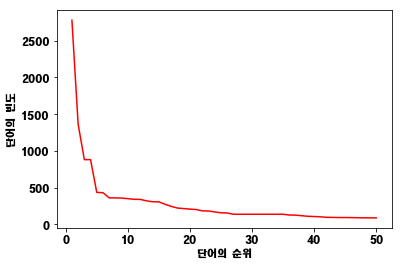

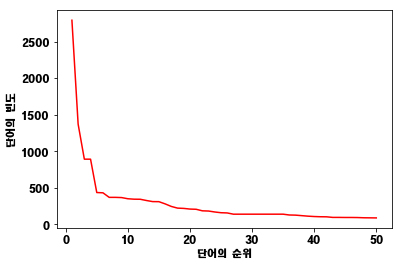

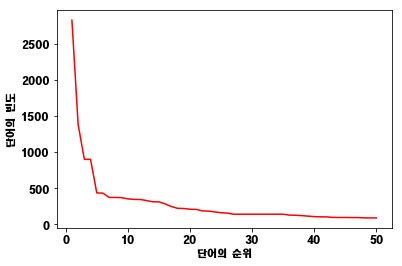

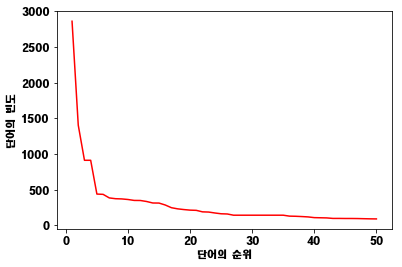

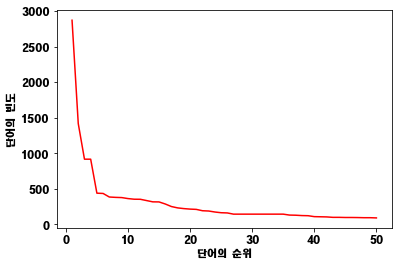

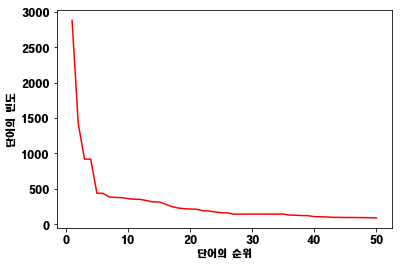

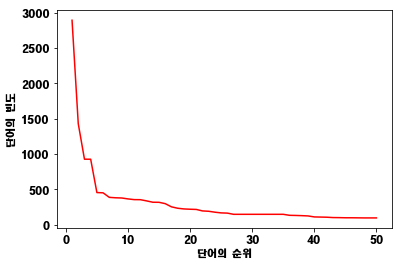

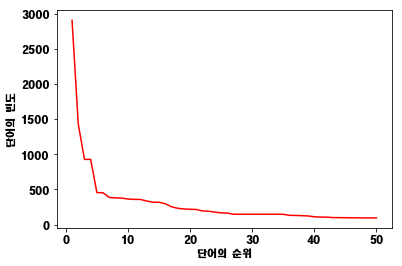

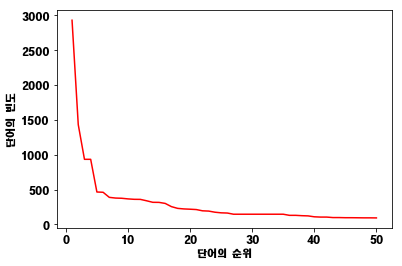

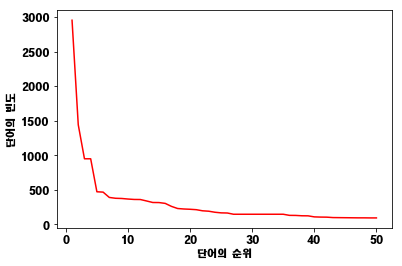

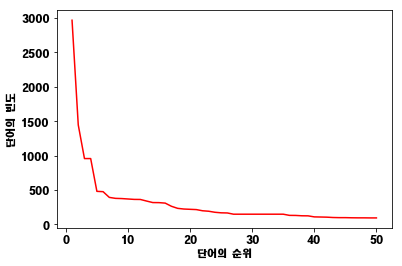

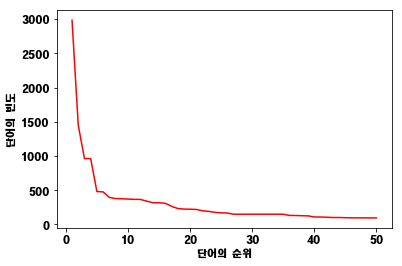

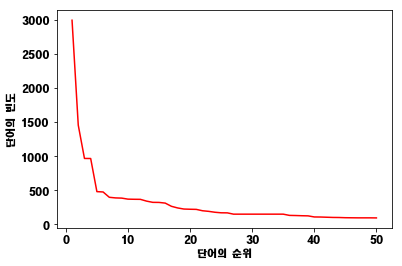

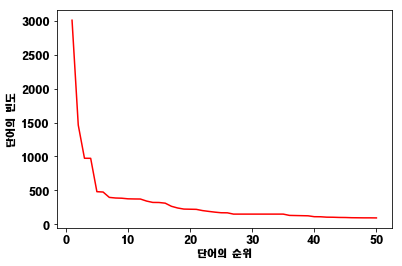

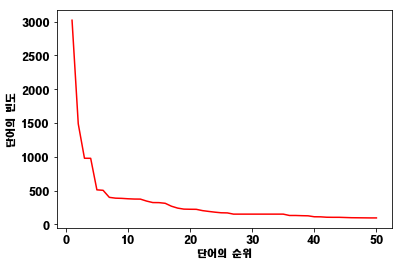

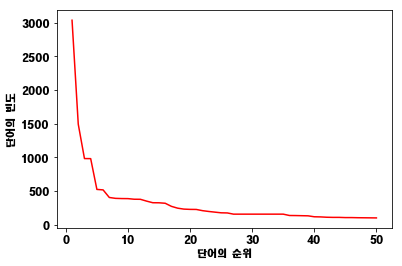

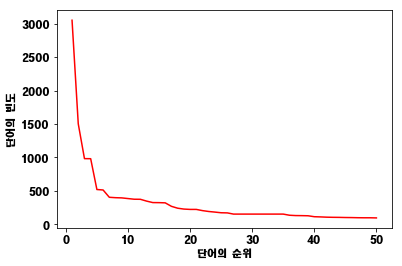

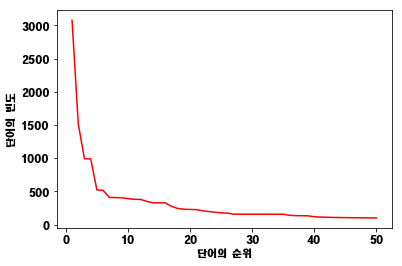

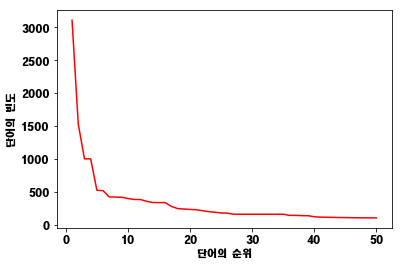

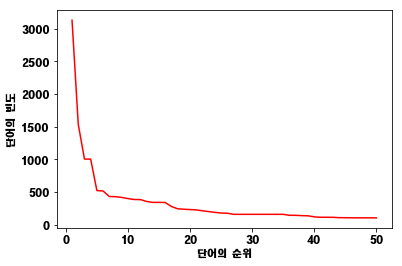

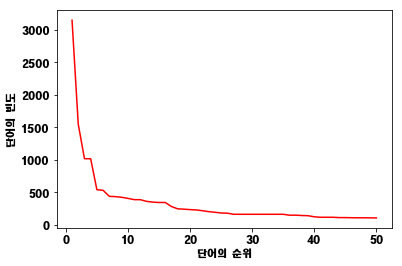

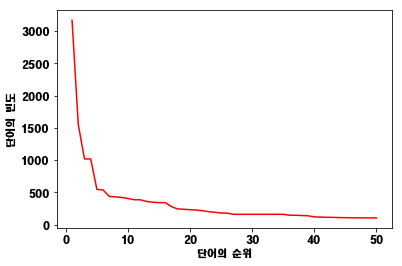

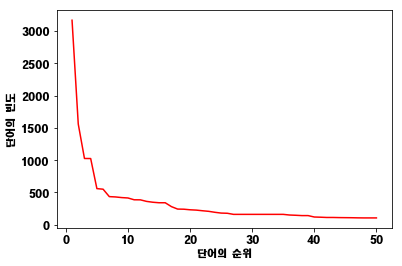

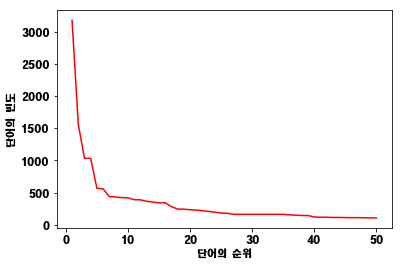

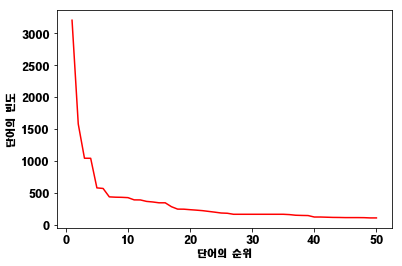

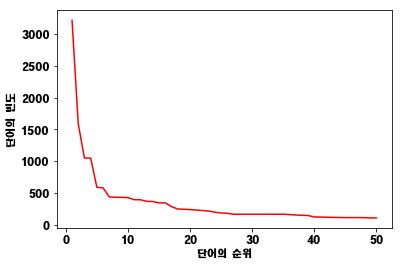

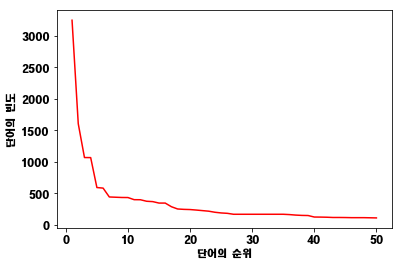

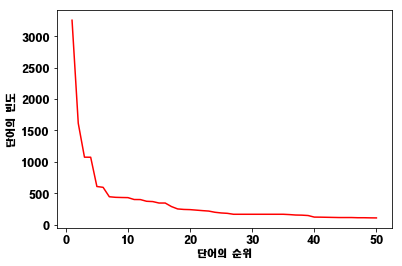

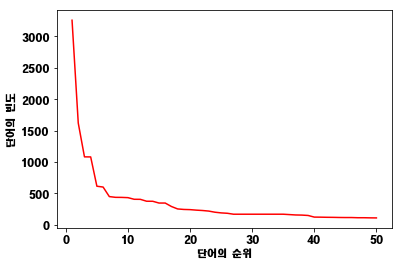

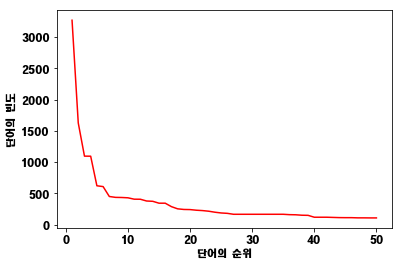

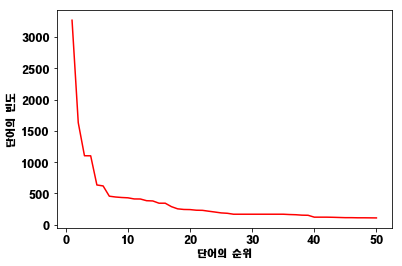

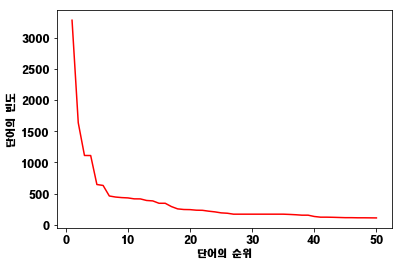

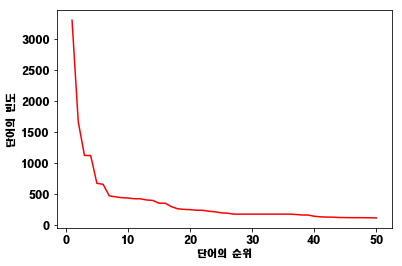

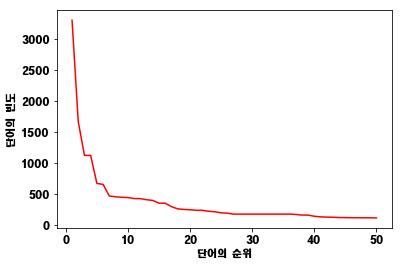

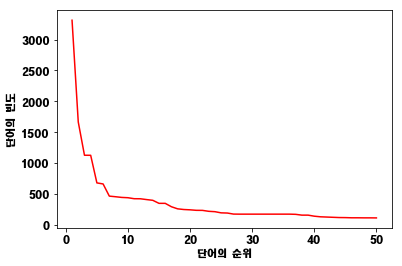

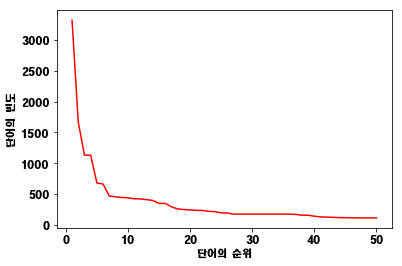

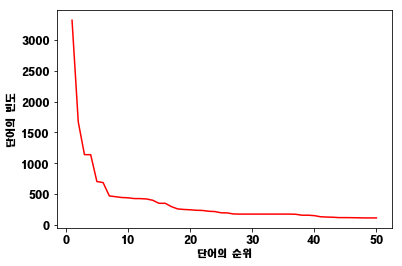

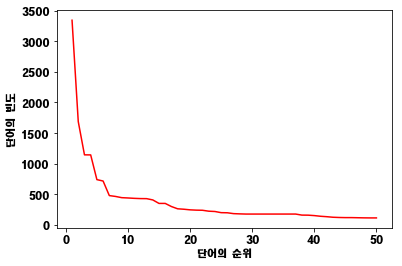

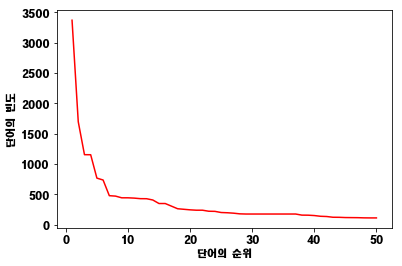

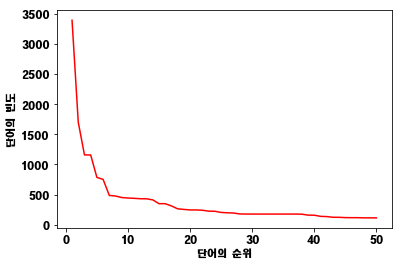

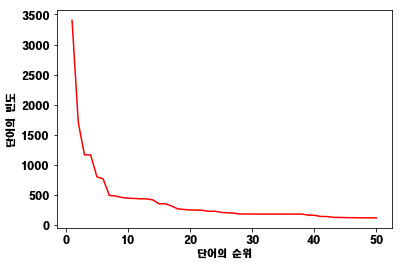

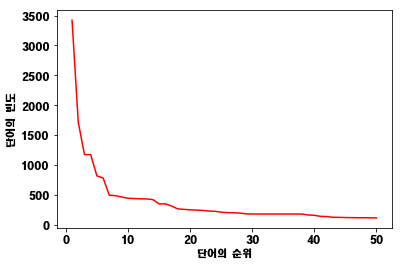

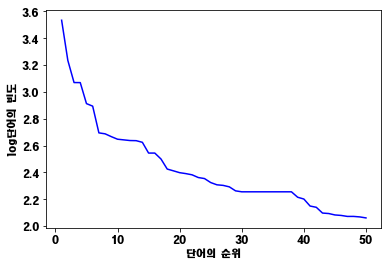

In [11]:
# 직접 크롤링한 네이버 뉴스기사들의 최빈(가장 많이 나오는)단어 그래프로 출력해보기

path = "C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts" # 네이버 뉴스기사가 저장된 경로(상대경로)
# path = "./0314_DownloadedNewstxts/" # 네이버 뉴스기사가 저장된 경로(절대경로)
abspath = os.path.abspath(".0311_main.py")
print(abspath)

corpora = [] # 뉴스 기사들을 모두 합치기 위한 객체
for file in [_ for _ in os.listdir(path) if _.endswith('.txt')]: # .txt로 끝나는 모든 파일에 대해 수행
    # 윈도우즈에서 파일을 열때 인코딩 문제가 발생하는 것을 방지하기 위해 인코딩 지정(UTF-8)
    with open('{0}/{1}'.format(path, file), encoding='utf8') as fp: 
        corpora.append(fp.read()) # corpora에 열린 파일들을 모두 append
    
txt = ''
    
# 모든 뉴스 기사의 최빈 단어 출력해보기 
for corpus in corpora:
    txt += corpus # txt에 corpus의 모든 내용을 합침
    tokens = Text(word_tokenize(txt)) # 합친 문서에 대해 토큰화 수행
        
    # tokens = Text(word_tokenize(corpora[0]))

    # 많이 나온 단어들을 조사
    x = range(1, len(tokens.vocab().most_common(50))+1)  # tuple이기 대문에 range 함수를 사용해야 한다.
    y = [token[1] for token in tokens.vocab().most_common(50)] # 자주 나오는 상위 50개 단어를 출력

    # 단어의 빈도에 따른 그래프 확인 
    plt.plot(x, y, 'r-')
    plt.xlabel('단어의 순위') # x축 제목 정하기
    plt.ylabel('단어의 빈도') # y축 제목 정하기
    plt.show() # 그래프 출력
    
# 로그를 씌운 그래프 출력 (zipf's law에 따르면 자기의 순위에 반비례하므로, 거의 리니어한 선이 나와야 한다.)
# 중요도를 기준으로 중요하지 않은 단어('.' 등)를 삭제하고 중요한 단어들을 확인하기 위해 그래프를 그려 보는 것.
_x = [math.log10(_) for _ in x]
_y = [math.log10(_) for _ in y]

plt.plot(x, _y, 'b-')
plt.xlabel('단어의 순위')
plt.ylabel('log단어의 빈도')
plt.show()

## Kobill corpus 분석해보기

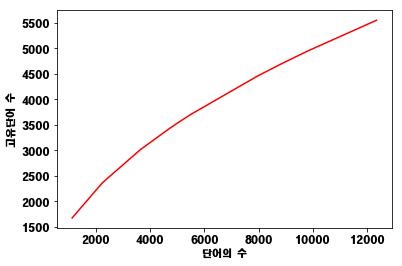

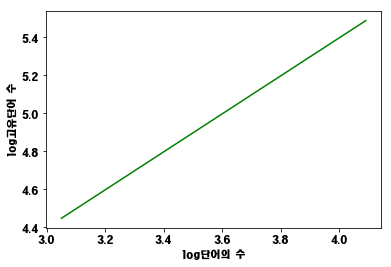

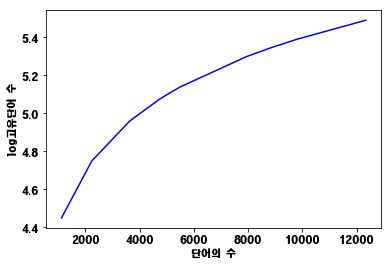

In [10]:
# Kobill corpus 분석해보기
from konlpy.corpus import kobill

k = 50 # 10 - 100
b = 0.5 # 0.4 - 0.6
corpora = [] # 말뭉치를 계속 덧붙이기 위한 빈 객체

for file in kobill.fileids():
    corpora.append(kobill.open(file).read())  

x = []
y = []
logX = []
logY = []

txt = ''
for corpus in corpora:
    txt += corpus
    tokens = Text(word_tokenize(txt))
    
    x.append(len(tokens))
    y.append(k * len(tokens)**b)
    
    logX.append(math.log10(len(tokens)))
    logY.append(math.log10(k) + math.log10(len(tokens)*b))

plt.plot(x, y, 'r-')
plt.xlabel('단어의 수')
plt.ylabel('고유단어 수')
plt.show()

plt.plot(logX, logY, 'g-')
plt.xlabel('log단어의 수')
plt.ylabel('log고유단어 수')
plt.show()  

plt.plot(x, logY, 'b-')
plt.xlabel('단어의 수')
plt.ylabel('log고유단어 수')
plt.show()  

## 직접 크롤링한 네이버 뉴스 기사 분석해보기

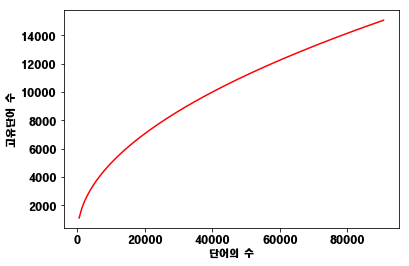

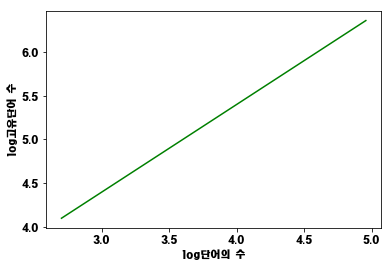

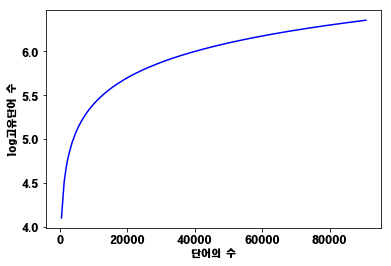

In [12]:
# 직접 크롤링한 네이버 뉴스 기사 분석해보기 (수집한 기사의 사이즈에 따라 시간이 오래 걸릴 수 있음)
path = "C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts"
corpora = []
for file in [_ for _ in os.listdir(path) if _.endswith('.txt')]:
    with open('{0}/{1}'.format(path, file), encoding='utf8') as fp:
        corpora.append(fp.read())

x = []
y = []
logX = []
logY = []

txt = ''
for corpus in corpora:
    txt += corpus
    tokens = Text(word_tokenize(txt))
    
    x.append(len(tokens))
    y.append(k * len(tokens)**b)
    
    logX.append(math.log10(len(tokens)))
    logY.append(math.log10(k) + math.log10(len(tokens)*b))

plt.plot(x, y, 'r-')
plt.xlabel('단어의 수')
plt.ylabel('고유단어 수')
plt.show()

plt.plot(logX, logY, 'g-')
plt.xlabel('log단어의 수')
plt.ylabel('log고유단어 수')
plt.show()  

plt.plot(x, logY, 'b-')
plt.xlabel('단어의 수')
plt.ylabel('log고유단어 수')
plt.show() 

## 영어 불용어 처리하기

In [25]:
# 영어 불용어 처리하기

from nltk.corpus import stopwords

# stopwords.fileids(), len(stopwords.fileids())
stop = stopwords.open('english').read() # 불용어 사전 오픈 

sentence = 'i love you' # love  
sentence = 'Beautiful is better than ugly.'

print(sentence.split()) # 단순히 단어 단위로 분리
print(word_tokenize(sentence))

# Normalization 하기 (쓸데없는 문자 정제)
# 정규식을 이용하여 마침표(.), 느낌표(!)와 같이 쓸데없는 요소들을 제거
# 단, 신조어와 같이 축약어나 .이 들어가서 구분되는 단어들은 주의해야 한다.
# 1. 구두점 제거
pattern = re.compile(r'[{0}]'.format(re.escape(punctuation))) 
sentence = pattern.sub('',sentence) # 패턴에 걸리는 문자는 공백으로 치환

# 2. Tokenize (공백과 구두점을 기반으로 토큰화)
terms = word_tokenize(sentence)
cleanTerms = []

# stopwords 
# 3. 불용어 처리
for term in terms:
    if term not in stop: # 구두점이 stop 불용어 사전에 들어 있지 않은 경우 실행. 
#         print('Skipped') # 제대로 처리되었는지 확인하기 위한 print문
#     else:
#         print(term)
        cleanTerms.append(term) # 정제된 결과물

print(sentence)
print(cleanTerms)

['Beautiful', 'is', 'better', 'than', 'ugly.']
['Beautiful', 'is', 'better', 'than', 'ugly', '.']
Beautiful is better than ugly
['Beautiful', 'better', 'ugly']


## 한국어 불용어 처리하기

In [27]:
sentence = '어머님 은 자장면 이 싫다 고 하셨 어.'
stop = ['은','는','이','가','을','를','께서','오','고','어'] # 한국어 불용어 사전 정의

print(sentence.split())
print(word_tokenize(sentence))

# Normalization
# 1. 구두점 제거
pattern = re.compile(r'[{0}]'.format(re.escape(punctuation)))
sentence = pattern.sub('',sentence) # 정규식 패턴대로 쓸데없는 문자 제거한 후 반환(공백으로 치환)

# 2. Tokenize (공백과 구두점을 기반으로 토큰화)
terms = word_tokenize(sentence)
cleanTerms = []

# stopwords 
# 3. 불용어 처리
for term in terms:
    if term not in stop: # 불용어인지 검사
        cleanTerms.append(term) # 불용어가 없는 텍스트만 cleanTerms에 append 
    
print(cleanTerms)

['어머님', '은', '자장면', '이', '싫다', '고', '하셨', '어.']
['어머님', '은', '자장면', '이', '싫다', '고', '하셨', '어', '.']
['어머님', '자장면', '싫다', '하셨']


In [29]:
sentence = "I'd like to learn more something."
# print("I".lower()) # 소문자로 변형.

threshold = 2
# 길이가 threshold를 넘어가는 경우만 출력
for token in word_tokenize(sentence):
    if len(token) > 2: 
        print(token)
        
pattern = re.compile(r'\b\w{1,%d}\b' % threshold) # 짧은 길이의 단음절을 검색하는 정규식 패턴
print(sentence)
print(pattern.sub('',sentence))

like
learn
more
something
I'd like to learn more something.
' like  learn more something.


## 빈도에 따라 걸러내기

In [30]:
sentence = "I'd like to learn more something. I'd like to learn more I."

threshold = 2
        
pattern = re.compile(r'\b\w{1,%d}\b' % threshold)
tokens = Text(word_tokenize(sentence))

for k in tokens.vocab():
    if tokens.count(k) > 2 or tokens.count(k) < 2:
        print('Skipped : {0} : {1}'.format(k,tokens.count(k)))
    else:
        print('>>', k)
        
print(sentence)

Skipped : I : 3
>> 'd
>> like
>> to
>> learn
>> more
Skipped : something : 1
>> .
I'd like to learn more something. I'd like to learn more I.


## Ngram 기법을 활용하기 위한 함수 정의 (상세설명은 0318_main.py참고)

In [31]:
def ngramUmjeol(term, n=2): # 음절 단위로 구분하는 함수. sentence를 받아 2개(n=2)씩 쪼갠다.

    ngram = []
    
    for i in range(len(term) - n + 1):
        # ngram.append(tokens_ngram[i:i+n]) # 방법1
        # ngram.append(tuple(tokens_ngram[i:i+n])) # 방법2 (튜플로 반환 시 키값을 쓸 수 있음)
        ngram.append(''.join(term[i:i + n]) # 방법3
        
    return ngram

In [32]:
def splitTerms(term):
    termList = term.split()
    result = []    
    for t in termList:
        result.append(' '.join(['<w>']+list(t)+['</w>']))
        
    return ' _ '.join(result)

In [33]:
from collections import defaultdict
def findNgram(tokens, n=2):
    result = defaultdict(int)
    for k, v in tokens.items():
        term = k.split()        
        for i in range(len(term) - n + 1):
            ngram = (term[i], term[i+1])         
            if ngram in result.keys():
                result[ngram] += v
            else:
                result[ngram] = v
                
    return result   

In [34]:
def mergeNgram(maxKey, data):
    result = defaultdict(int)   
    token = ' '.join(maxKey)
    pattern = re.compile(r'(?!=\S)' + token + '(?!\S)') # S : whitespace    
    for k, v in data.items():
        new = pattern.sub(''.join(maxKey), k)
        result[new] = v
        
    return result

## 한국어 비속어 처리하기

In [37]:
# * 한글 욕설 필터링 방법 두 가지
# 1. 한글만 뽑거나 (ex. [가-힣]+)
# 2. 단어라고 하는 영역 안에 있는 다른 글자를 제거 (ex. \w[0-9]+\w)

# 가장 기본적인 형태의 비속어 필터링 (매치되는 단어를 *로 치환)
stop = ['시발'] # 욕설 필터링을 위한 불용어 사전 정의 (반대로 응용하면 중요한 단어를 뽑는 데에도 사용 가능)

sentence = '시발 짜증나네'
result = []

for term in sentence.split():
    if term in stop:
        result.append('*' * len(term))
    else:
        result.append(term)
        
print(' '.join(result))

** 짜증나네


In [39]:
# 비속어가 포함된 단어 전체를 *으로 치환
stop = ['시발', '씨발'] # 불용어 사전

sentence = '씨발짜증나네 시발 씨발 씨발12 시발123'
result = []

for term in sentence.split():
    if term in stop:
        result.append('*' * len(term))
    else:
        flag = False    
        for token in ngramUmjeol(term):
            if token in stop:
                flag = True
        if flag:
            result.append('*' * len(term))        
        else:
            result.append(term)
        
print(' '.join(result))

****** ** ** **** *****


In [47]:
# 욕설 사이에 숫자를 넣는 경우에 대한 필터링
stop = ['시발', '씨발']

sentence = '시123발 시~발'
result = []

pattern = re.compile(r'\B[0-9]+\B')
# pattern = re.compile(r'[0-9]+')
sentence = pattern.sub('', sentence)

for term in sentence.split():
    if term in stop:
        result.append('*' * len(term))
    else:
        flag = False    
        for token in ngramUmjeol(term):
            if token in stop:
                flag = True
        if flag:
            result.append('*' * len(term))        
        else:
            result.append(term)
            
print(' '.join(result))

** 시~발


In [48]:
# 욕설 사이에 특수문자를 넣는 경우에 대한 필터링 
data = {
    splitTerms('시발'):10, # <w> 시 발 </w>
    splitTerms('시~발'):2, # <w> ? </w> <w> 시 발 </w>
    splitTerms('시!발'):2,
    splitTerms('시1발'):2
}

for i in range(2):
    pattern = findNgram(data)
    maxKey = max(pattern, key = lambda x:pattern[x]) 
    data = mergeNgram(maxKey, data) 

pattern = findNgram(data)
maxKey = max(pattern, key = lambda x:pattern[x])

sentence = '시발 시1~!발 시~!~발'
repattern = re.compile(maxKey[0] + '.*' + maxKey[1])

result = []
for token in sentence.split():
    if repattern.search('<w>{0}</w>'.format(token)):
        result.append('*'*len(token))
    else:
        result.append(token)

print(' '.join(result))

** ***** *****
